# Objective
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

## Import Libraries

In [1732]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from scipy import stats
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

## Import Dataset

In [1733]:
# Read the CSV file
df=pd.read_csv('bank-full.csv')

## Univariate analysis

### Check datatype, Summary, shape, Null values

In [1734]:
df.info()       # Info about dataframe, columns, data types, Null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [1735]:
print('Shape of the dataframe is:',df.shape)       # Shape of data frame 
print('-----First five rows are-----')
df.head()                                          # First five rows
print('-----Last five rows are-----')
df.tail()                                          # Last five rows
print('-----Number of unique values-----')
df.nunique()                                       # Number of unique values in each column
print('-----Number of Nulls-----')
df.isnull().sum()                                  # Check Null values
df.describe().transpose()                          # Statistical summary

Shape of the dataframe is: (45211, 17)
-----First five rows are-----


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

-----Last five rows are-----


age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no

-----Number of unique values-----


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

-----Number of Nulls-----


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

* The independent variables are --> age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome
* The dependent variable is --> Target
* The categorical columns are represented as Object datatype and hence need to be converted.
* There are 45211 rows and 17 columns
* There are outliers especially for age, balance and campaign and data is right skewed
* Data for age and campaign seems to be real world situation

In [1736]:
# Convert to categorical data type
df['job']=df['job'].astype('category')
df['marital']=df['marital'].astype('category')
df['education']=df['education'].astype('category')
df['default']=df['default'].astype('category')
df['housing']=df['housing'].astype('category')
df['loan']=df['loan'].astype('category')
df['contact']=df['contact'].astype('category')
df['month']=df['month'].astype('category')
df['poutcome']=df['poutcome'].astype('category')
df['Target']=df['Target'].astype('category')

# Check datatyoes
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

### Age

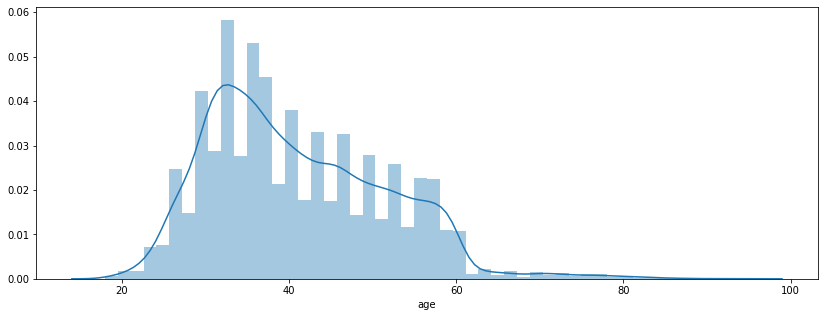

In [1737]:
plt.figure(figsize=(14,5))
sns.distplot(df['age']);

In [1738]:
df['age'].unique()       # Check unique values
df['age'].isnull().sum() # Check null
df['age'].describe()     # Check mean, min, max, std, quartiles
df['age'].median()       # Median value

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

0

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

39.0

* Mean for Age is 40.936210
* Median (Q2) for Age is 39
* Not much difference between mean and median age
* Min value for Age is 18
* Max value for Age is 95
* Q1 for Age is 33
* Q2 for Age is 39
* Q3 for Age is 48
* As we can see from the plot above data is right skewed

In [1739]:
# Q1 and Q3 values from above
outliers_lower=33-1.5*(48-33)
outliers_upper=48+1.5*(48-33)
print(outliers_lower)
print(outliers_upper)
# Number of outliers
print('Number of outliers lower:',df[df['age']<outliers_lower]['age'].count()) # Lower
print('Number of outliers upper:',df[df['age']>outliers_upper]['age'].count()) # Upper

10.5
70.5
Number of outliers lower: 0
Number of outliers upper: 487


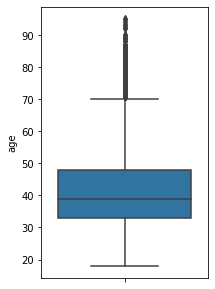

In [1740]:
plt.figure(figsize=(3,5))
sns.boxplot(x='age',data=df, orient='v');

### Analysis for age
* The minimum age is 18 and maximum age is 95 so the spread is across
* There is little variance between mean and median values and we do not see any null values
* The data for age is right skewed as can be seen from distplot and boxplot above
* Though there are outliers but they seem to be real world situation

### Job

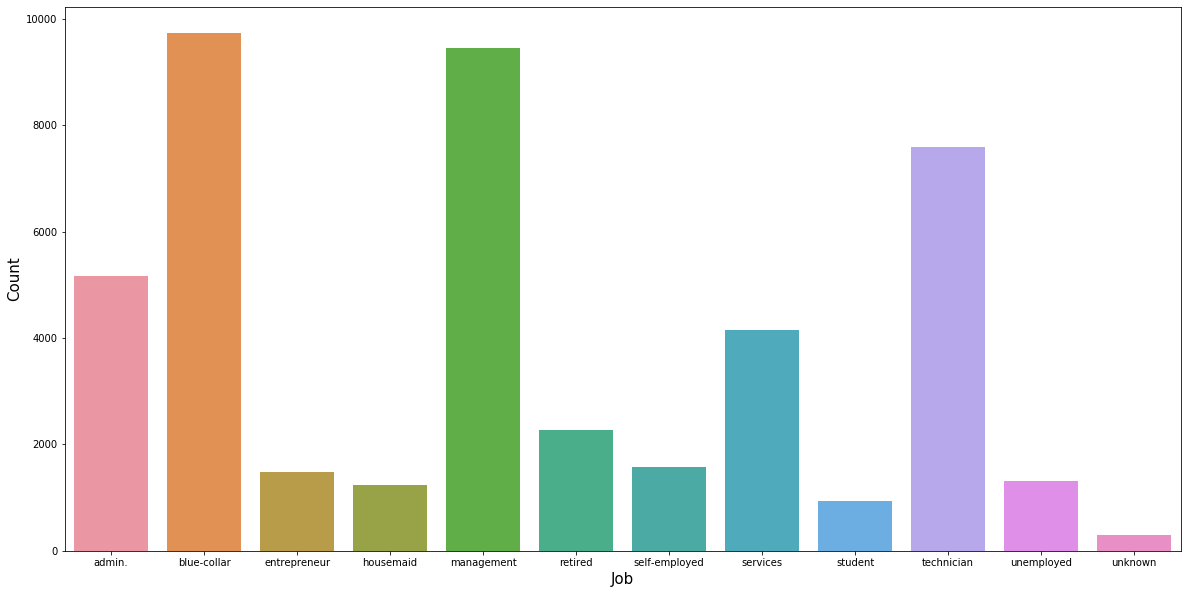

In [1741]:
plt.figure(figsize=(20,10))
sns.countplot(df['job'],data=df)
plt.xlabel('Job', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

In [1742]:
df['job'].unique()       # Check unique values
df['job'].isnull().any() # Check null

[management, technician, entrepreneur, blue-collar, unknown, ..., services, self-employed, unemployed, housemaid, student]
Length: 12
Categories (12, object): [management, technician, entrepreneur, blue-collar, ..., self-employed, unemployed, housemaid, student]

False

In [1743]:
df['job'].value_counts() 
df['job'].value_counts(normalize=True) # value counts %age

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

### Analysis for job
* For 288 customers the job information is not known
* There are more customers in blue-collar (21.5%) and management (21%) jobs
* There are no null values

### Marital

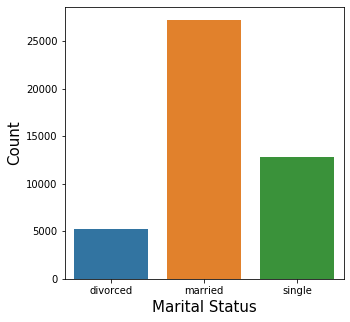

In [1744]:
plt.figure(figsize=(5,5))
sns.countplot(df['marital'],data=df)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

In [1745]:
df['marital'].unique()       # Check unique values
df['marital'].isnull().any() # Check null
df['marital'].value_counts() # value counts
df['marital'].value_counts(normalize=True) # value counts %age

[married, single, divorced]
Categories (3, object): [married, single, divorced]

False

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

### Analysis for marital
* There are more married customers followed by singles
* There are no null values

### Education

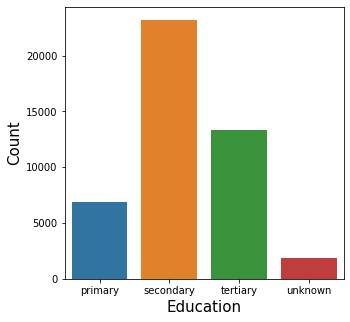

In [1746]:
plt.figure(figsize=(5,5))
sns.countplot(df['education'],data=df)
plt.xlabel('Education', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

In [1747]:
df['education'].unique()       # Check unique values
df['education'].isnull().any() # Check null
df['education'].value_counts() # value counts
df['education'].value_counts(normalize=True) # value counts %age

[tertiary, secondary, unknown, primary]
Categories (4, object): [tertiary, secondary, unknown, primary]

False

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

### Analysis for education
* There are maximum customers with secondary education followed by tertiary
* There are 1857 customers for which education details are not available
* Threre are no null values

### Credit in default (default)

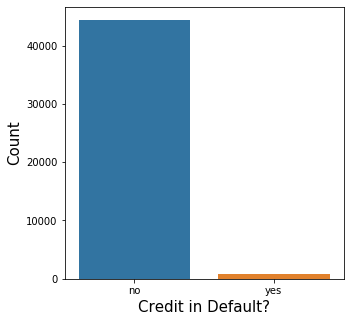

In [1748]:
plt.figure(figsize=(5,5))
sns.countplot(df['default'],data=df)
plt.xlabel('Credit in Default?', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

In [1749]:
df['default'].unique()       # Check unique values
df['default'].isnull().any() # Check null
df['default'].value_counts() # value counts
df['default'].value_counts(normalize=True) # value counts %age

[no, yes]
Categories (2, object): [no, yes]

False

no     44396
yes      815
Name: default, dtype: int64

no     0.981973
yes    0.018027
Name: default, dtype: float64

### Analysis for credit in default
* There are only 815 customers with credit in default
* Approximately 98% customers do not have credit in default
* There are no null values

### Housing Loan (housing)

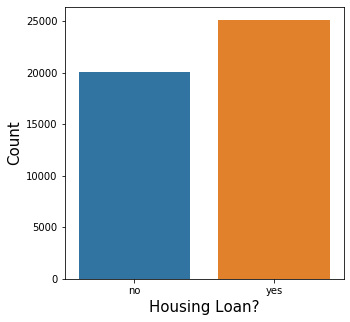

In [1750]:
plt.figure(figsize=(5,5))
sns.countplot(df['housing'],data=df)
plt.xlabel('Housing Loan?', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

In [1751]:
df['housing'].unique()       # Check unique values
df['housing'].isnull().any() # Check null
df['housing'].value_counts() # value counts
df['housing'].value_counts(normalize=True) # value counts %age

[yes, no]
Categories (2, object): [yes, no]

False

yes    25130
no     20081
Name: housing, dtype: int64

yes    0.555838
no     0.444162
Name: housing, dtype: float64

### Analysis for housing loan
* There are more customers who have housing loan
* There are no null values

### Personal Loan (loan)

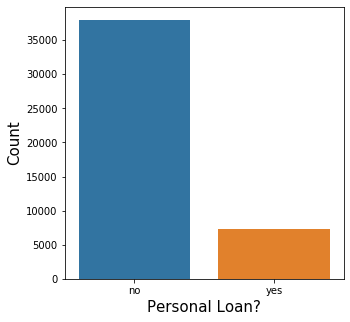

In [1752]:
plt.figure(figsize=(5,5))
sns.countplot(df['loan'],data=df)
plt.xlabel('Personal Loan?', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

In [1753]:
df['loan'].unique()       # Check unique values
df['loan'].isnull().any() # Check null
df['loan'].value_counts() # value counts
df['loan'].value_counts(normalize=True) # value counts %age

[no, yes]
Categories (2, object): [no, yes]

False

no     37967
yes     7244
Name: loan, dtype: int64

no     0.839774
yes    0.160226
Name: loan, dtype: float64

### Analysis for personal loan
* There are more customers (~84%) who do not have personal loan
* There are no null values

### Balance in account (balance)

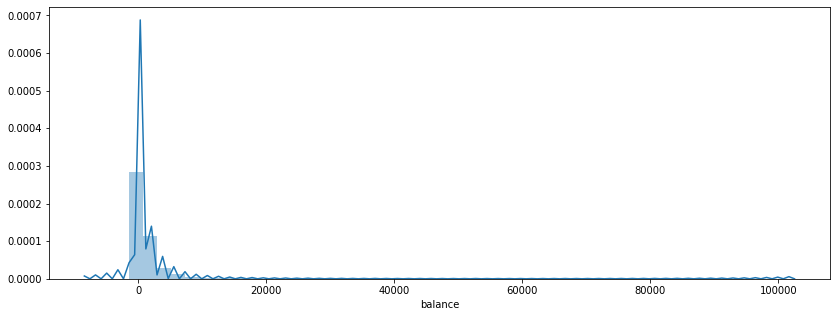

In [1754]:
plt.figure(figsize=(14,5))
sns.distplot(df['balance']);

In [1755]:
df['balance'].isnull().any() # Check null
df['balance'].describe()     # Check mean, min, max, std, quartiles
df['balance'].median()       # Median value

False

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

448.0

* Mean for balance is 1362.272058
* Median or Q2 for balance is 448.9
* Min value for balance is -8019
* Max value for balance is 102127
* Q1 for balance is 72
* Q2 for balance is 448
* Q3 for balance is 1428
* We see in plot above data is right skewed

In [1756]:
# Q1 and Q3 values from above
outliers_lower=72-1.5*(1428-72)
outliers_upper=1428+1.5*(1428-72)
print(outliers_lower)
print(outliers_upper)
# Number of outliers
print('Number of outliers lower:',df[df['balance']<outliers_lower]['balance'].count()) # Lower
print('Number of outliers upper:',df[df['balance']>outliers_upper]['balance'].count()) # Upper

-1962.0
3462.0
Number of outliers lower: 17
Number of outliers upper: 4712


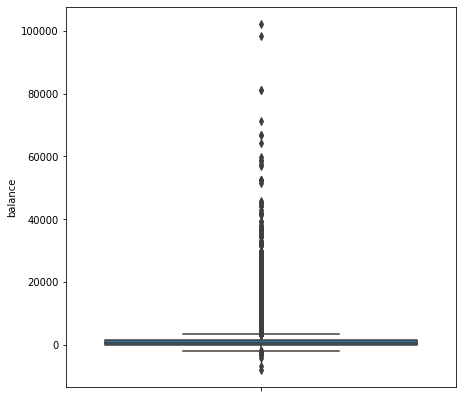

In [1757]:
plt.figure(figsize=(7,7))
sns.boxplot(x='balance',data=df, orient='v');

### Analysis for balance
* The minimum balance is -8019 and maximum balance is 102127
* There is much variance between mean and median values and we do not see any null values
* The data for balance is highly right skewed as can be seen from distplot and boxplot above
* As we can see from above the upper boundary for outliers is 3462 and there are 4712 outliers in upper boundary

### Contact type (contact)

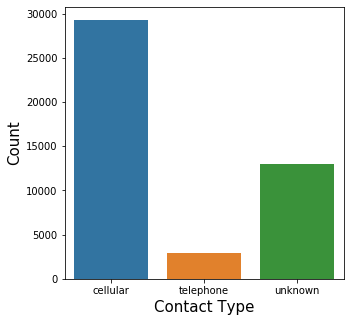

In [1758]:
plt.figure(figsize=(5,5))
sns.countplot(df['contact'],data=df)
plt.xlabel('Contact Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

In [1759]:
df['contact'].unique()       # Check unique values
df['contact'].isnull().any() # Check null
df['contact'].value_counts() # value counts
df['contact'].value_counts(normalize=True) # value counts %age

[unknown, cellular, telephone]
Categories (3, object): [unknown, cellular, telephone]

False

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

### Analysis for contact type
* There are more customers (~65%) who were contacted on mobile
* However for 13020 customers (~6%) contact type is unknown
* There are no null values

### Last contact (day, month)

In [1760]:
df['day'].unique()       # Check unique values
df['day'].isnull().any() # Check null
df['day'].value_counts() # value counts
df['day'].value_counts(normalize=True) # value counts %age

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

False

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

20    0.060870
18    0.051050
21    0.044812
17    0.042888
6     0.042733
5     0.042246
14    0.040875
8     0.040742
28    0.040477
7     0.040189
19    0.038862
29    0.038597
15    0.037668
12    0.035456
13    0.035058
30    0.034638
9     0.034527
11    0.032713
4     0.031961
16    0.031298
2     0.028599
27    0.024795
3     0.023866
26    0.022893
23    0.020769
22    0.020017
25    0.018580
31    0.014222
10    0.011590
24    0.009887
1     0.007122
Name: day, dtype: float64

In [1761]:
df['month'].unique()       # Check unique values
df['month'].isnull().any() # Check null
df['month'].value_counts() # value counts
df['month'].value_counts(normalize=True) # value counts %age

[may, jun, jul, aug, oct, ..., jan, feb, mar, apr, sep]
Length: 12
Categories (12, object): [may, jun, jul, aug, ..., feb, mar, apr, sep]

False

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

### Analysis for contact month
* Maximum contacts were made in the month of May and maximum contacts range from May to August
* There are no null values

### Number of contacts (campaign)

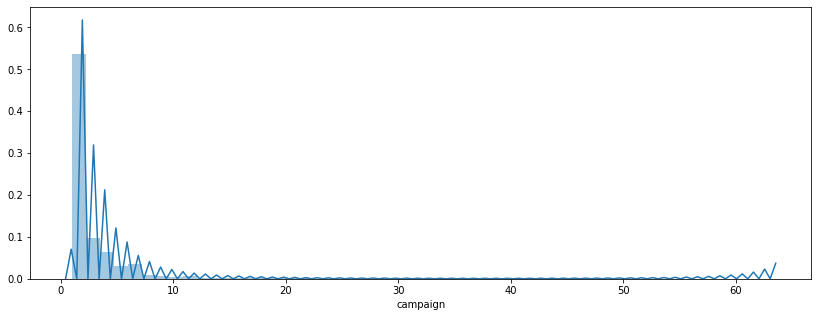

In [1762]:
plt.figure(figsize=(14,5))
sns.distplot(df['campaign']);

In [1763]:
df['campaign'].isnull().any() # Check null
df['campaign'].describe()     # Check mean, min, max, std, quartiles
df['campaign'].median()       # Median value

False

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

2.0

* Mean for campaign is 2.763841
* Median or Q2 for campaign is 2
* Min value for campaign is 1
* Max value for campaign is 63
* Q1 for campaign is 1
* Q2 for campaign is 2
* Q3 for campaign is 3
* We see in the plot above data is right skewed

In [1764]:
# Q1 and Q3 values from above
outliers_lower=1-1.5*(3-1)
outliers_upper=3+1.5*(3-1)
print(outliers_lower)
print(outliers_upper)
# Number of outliers
print('Number of outliers lower:',df[df['balance']<outliers_lower]['balance'].count()) # Lower
print('Number of outliers upper:',df[df['balance']>outliers_upper]['balance'].count()) # Upper

-2.0
6.0
Number of outliers lower: 3691
Number of outliers upper: 37106


### Analysis for number of contacts (campaign)
* There is not much difference between mean and median values
* Minimum and Maximum for campaign are 1 and 63
* Data is highly right skewed

### Days since last contact (pdays)

In [1765]:
df['pdays'].isnull().any() # Check null
df['pdays'].describe()     # Check mean, min, max, std, quartiles
df['pdays'].median()       # Median value

False

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1.0

In [1766]:
print('pdays is -1: {}'.format(df[df.pdays==-1].shape[0]))

pdays is -1: 36954


We see that for majority of records the pdays value is -1 which means either the customer has never been contacted or it is more than 900 since last contact

### Number of contacts performed

In [1767]:
df['previous'].isnull().any() # Check null
df['previous'].describe()     # Check mean, min, max, std, quartiles
df['previous'].median()       # Median value

False

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

0.0

### Outcome of previous campaign

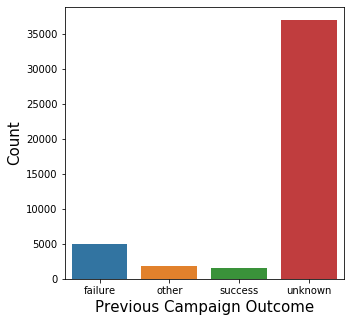

In [1768]:
plt.figure(figsize=(5,5))
sns.countplot(df['poutcome'],data=df)
plt.xlabel('Previous Campaign Outcome', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

In [1769]:
df['poutcome'].unique()       # Check unique values
df['poutcome'].isnull().any() # Check null
df['poutcome'].value_counts() # value counts
df['poutcome'].value_counts(normalize=True) # value counts %age

[unknown, failure, other, success]
Categories (4, object): [unknown, failure, other, success]

False

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

As we see from above the success rate from previous campaign was around 3% though for a majority of customers it is not known (81.74%)

### Did client subscribed (Target)

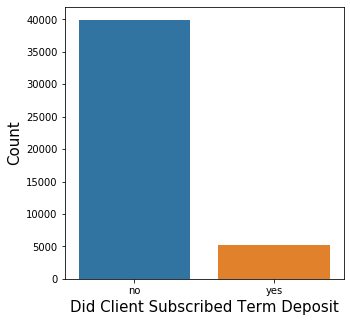

In [1770]:
plt.figure(figsize=(5,5))
sns.countplot(df['Target'],data=df)
plt.xlabel('Did Client Subscribed Term Deposit', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

In [1771]:
df['Target'].unique()       # Check unique values
df['Target'].isnull().any() # Check null
df['Target'].value_counts() # value counts
df['Target'].value_counts(normalize=True) # value counts %age

[no, yes]
Categories (2, object): [no, yes]

False

no     39922
yes     5289
Name: Target, dtype: int64

no     0.883015
yes    0.116985
Name: Target, dtype: float64

##### As we see from above around 12% customers subscribed to term deposits and there is some imbalance in out target variable

## Address different data challenges

#### Address unknown values

In [1772]:
# So far we have seen unknown/mising data for job and education which can impact our target variable
# Let's check job data again
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [1773]:
# From above we see for 288 customers we do not have their job information
# Let's check the number of customers who are above 60
df['job'][df['age']>60][df['job']=='unknown'].value_counts()

unknown          22
unemployed        0
technician        0
student           0
services          0
self-employed     0
retired           0
management        0
housemaid         0
entrepreneur      0
blue-collar       0
admin.            0
Name: job, dtype: int64

In [1774]:
# As we see from above 22 customers have no job information and are above the age of 60
# hence, we can move them to retired category
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'

In [1775]:
# Let's compare job with education to infer if there a corerelation and we can identify/infer unknown values
pd.crosstab(df['job'], df['education'])

education      primary  secondary  tertiary  unknown
job                                                 
admin.             209       4219       572      171
blue-collar       3758       5371       149      454
entrepreneur       183        542       686       76
housemaid          627        395       173       45
management         294       1121      7801      242
retired            796        989       371      130
self-employed      130        577       833       39
services           345       3457       202      150
student             44        508       223      163
technician         158       5229      1968      242
unemployed         257        728       289       29
unknown             50         66        34      116

In [1776]:
# As we can infer from above, in case a person has primary education only then mostly they have blue-collar jobs
# Similarly, we see a person with tertiary education mostly have management jobs
# We are unable to infer similar undertstanding for people with secondary education as the spread is across technician,
# blue-collar and admin. jobs
# Hence, moving customers with primary education and unknown job to blue-collar job
# and customers with tertiary education and unknown job to management job

df.loc[(df['education']=='primary') & (df['job']=='unknown'), 'job'] = 'blue-collar'
df.loc[(df['education']=='tertiary') & (df['job']=='unknown'), 'job'] = 'management'

In [1777]:
pd.crosstab(df['education'], df['job'])

job        admin.  blue-collar  entrepreneur  housemaid  management  retired  \
education                                                                      
primary       209         3808           183        627         294      796   
secondary    4219         5371           542        395        1121      989   
tertiary      572          149           686        173        7835      371   
unknown       171          454            76         45         242      130   

job        self-employed  services  student  technician  unemployed  unknown  
education                                                                     
primary              130       345       44         158         257        0  
secondary            577      3457      508        5229         728       66  
tertiary             833       202      223        1968         289        0  
unknown               39       150      163         242          29      116

In [1778]:
# As we can see above, we can infer below understanding
#  --> People in admin. job mostly have secondary education
#  --> People in management job mostly have tertiary education
#  --> People in services job mostly have secondary education
#  --> People in technician job mostly have secondary education
#  --> People in housemaid job mostly have primary education
# Hence, making changes as per this understanding/inference

df.loc[(df['job']=='admin.') & (df['education']=='unknown'), 'education'] = 'secondary'
df.loc[(df['job']=='management') & (df['education']=='unknown'), 'education'] = 'tertiary'
df.loc[(df['job']=='services') & (df['education']=='unknown'), 'education'] = 'secondary'
df.loc[(df['job']=='technician') & (df['education']=='unknown'), 'education'] = 'secondary'
df.loc[(df['job']=='housemaid') & (df['education']=='unknown'), 'education'] = 'primary'

#### Club into fewer classes

In [1779]:
# Categorize jobs and club into fewer classes
# We can club admin into management, housemaid into blue-collar and self employed with entrepreneur
mapping = {'admin.':'management', 'housemaid':'blue-collar', 'self-employed':'entrepreneur'}

df['job'] = df['job'].replace(mapping)
df['job'].value_counts()
df['job'].value_counts(normalize=True) # value counts %age
df['job']=df['job'].astype('category')

management      14663
blue-collar     11022
technician       7597
services         4154
entrepreneur     3066
retired          2286
unemployed       1303
student           938
unknown           182
Name: job, dtype: int64

management      0.324324
blue-collar     0.243790
technician      0.168034
services        0.091880
entrepreneur    0.067815
retired         0.050563
unemployed      0.028820
student         0.020747
unknown         0.004026
Name: job, dtype: float64

#### Address pdays values as -1

In [1780]:
# Earlier we saw that pdays had -1 for a huge number of records which means either the customer has never been contacted
# or it is more than 900 days
pd.crosstab(df['pdays'],df['poutcome'])

poutcome  failure  other  success  unknown
pdays                                     
-1              0      0        0    36954
 1              3      3        9        0
 2              1     35        1        0
 3              0      1        0        0
 4              1      0        1        0
...           ...    ...      ...      ...
 838            0      1        0        0
 842            1      0        0        0
 850            1      0        0        0
 854            1      0        0        0
 871            1      0        0        0

[559 rows x 4 columns]

##### As we can see from above, pdays is -1 when poutcome is 'unknown'. It effectively means that pdays has -1 because customer has  never been contacted. Let's break this up and categorize under different categories

In [1781]:
df['pdays_zero'] = 0
df['pdays_less_100'] = 0
df['pdays_great_100'] = 0
df['pdays_zero'][df['pdays']==-1] = 1
df['pdays_less_100'][(df['pdays']>-1) & (df['pdays']<=100)] = 1
df['pdays_great_100'][df['pdays']>100] = 1
df = df.drop('pdays', axis=1)
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  previous poutcome Target  \
0  unknown    5   may       261         1         0  unknown     no   
1  unknown    5   may       151         1         0  unknown     no   
2  unknown    5   may        76         1         0  unknown     no   
3  unknown    5   may        92         1         0  unknown     no   
4  unknown    5   may       198         1         0  unknown     no   

   pdays_zero  pdays_less_100  pdays_great_100  
0           1               0                0  
1           1               0                0  
2           1               0                0  
3           1               0                0  
4           1               0                0

## Outliers

From our analysis above we saw outliers for age, balance and campaign.
For age and campaign though there were outliers but there was not much variance between mean and median values and they seem to be real world situations, hence we will not treat them.

However, for balance we have a big difference in mean and median values, hence we will try to treat outliers for balance.

### Outlier treatment for balance
From our analysis above, we had:
* The minimum balance is -8019 and maximum balance is 102127
* There is much variance between mean and median values and we do not see any null values
* The data for balance is highly right skewed 
* Number of outliers upper: 4712
* Upper boundary for outliers: 3462

As we see above the number of upper range outliers is more than 10% as compared to overall data available, hence we need to transform for a better prediction model

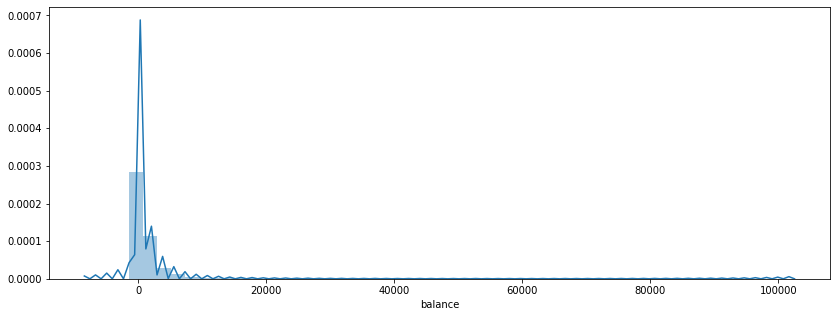

In [1782]:
# Lets look at balance data again
plt.figure(figsize=(14,5))
sns.distplot(df['balance']);

As we see -ve balances in the dataset, we can safely mark them as zero balance as customers with higher balance only will opt for term deposits.
Hence, converting -ve balances to zero.
Also, balance data is right skewed, and we are taking a hypothesis that customers with higher balances will opt for term deposits. We are converting all balances more than upper outlier boundary to upper boundary.

In [1783]:
df.loc[df.balance<0,'balance'] = 0

In [1784]:
df.loc[df.balance>3462,'balance'] = 3462

## Multivariate analysis

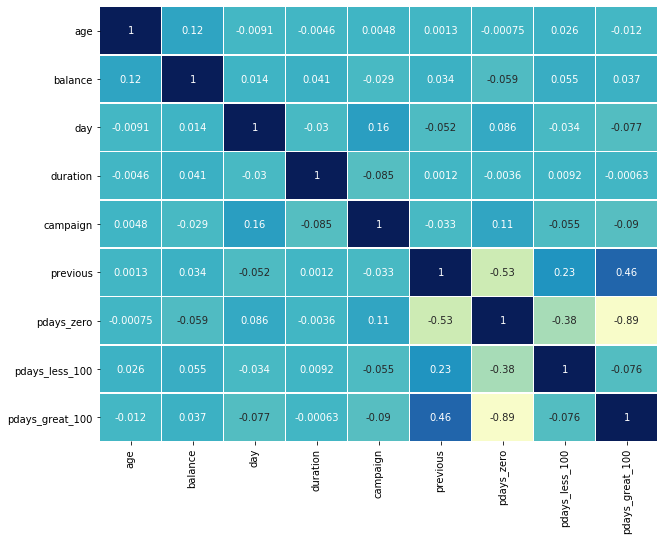

In [1785]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show();

<Figure size 1440x360 with 0 Axes>

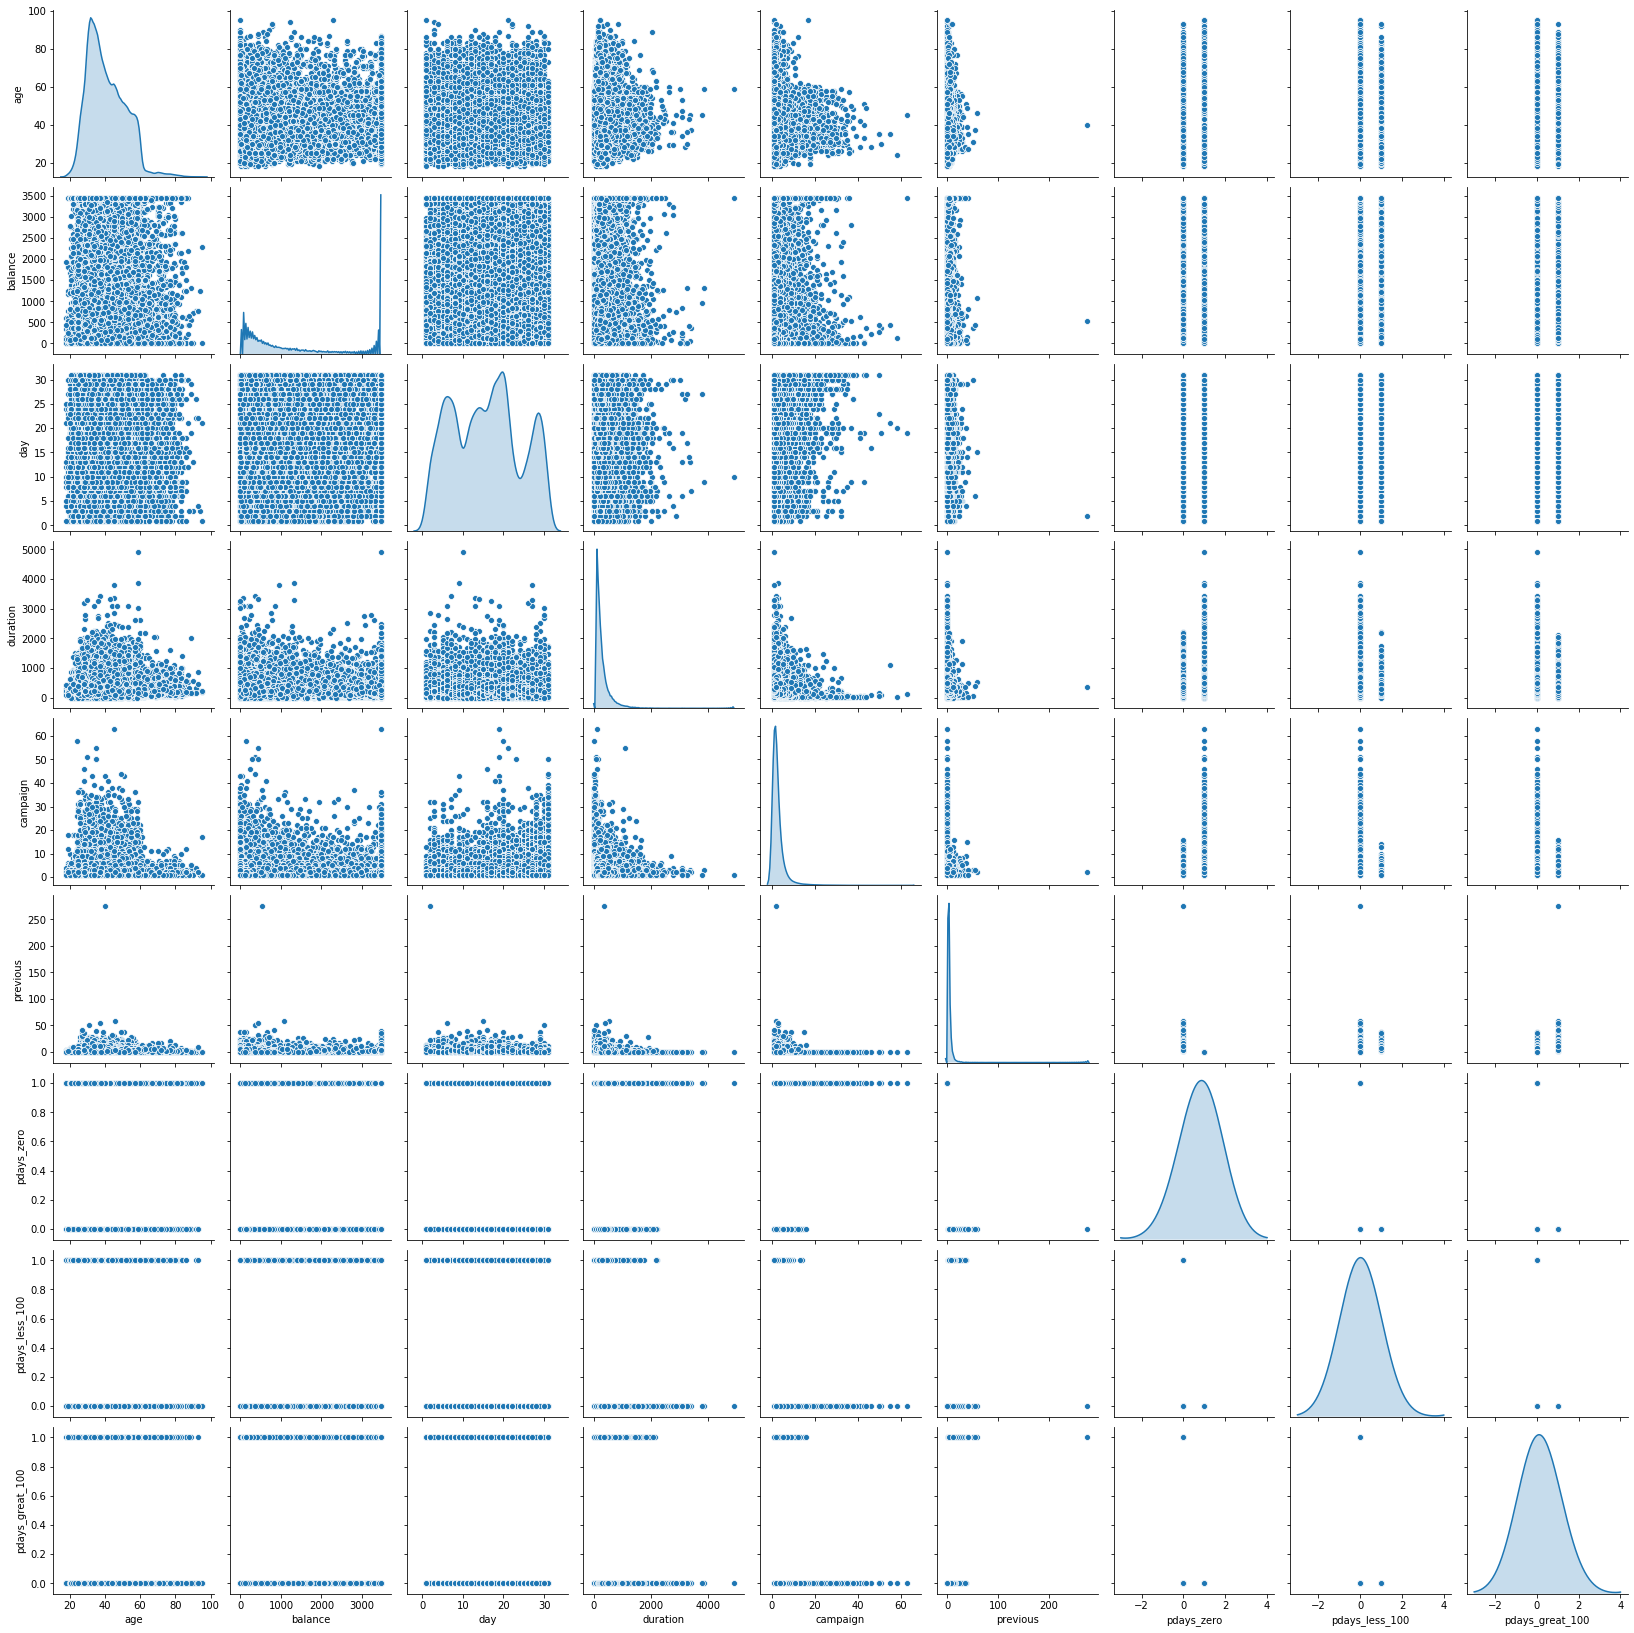

In [1786]:
plt.figure(figsize=(20,5))
sns.pairplot(df, diag_kind='kde', diag_kws={'bw':'1.0'})
plt.show();

### Target vs Age

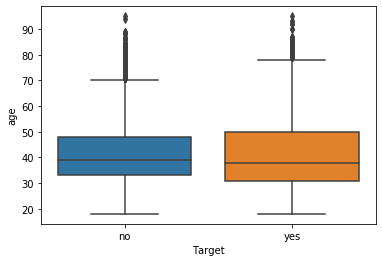

In [1787]:
# Target vs Age
sns.boxplot(x='Target', y='age', data=df)
plt.show();

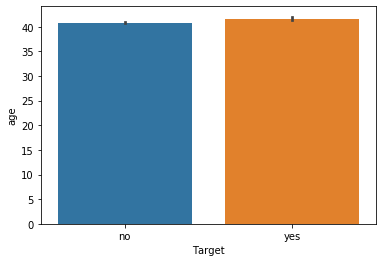

In [1788]:
# Target vs Age
sns.barplot(x='Target', y='age', data=df)
plt.show();

* Target variable does seem to be that much impacted by age

### Target vs balance

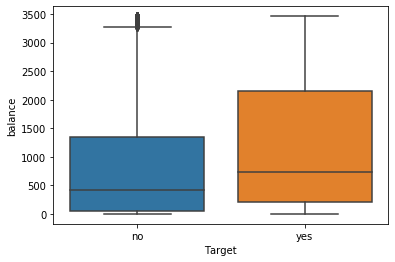

In [1789]:
# Target vs balance
sns.boxplot(x='Target', y='balance', data=df)
plt.show();

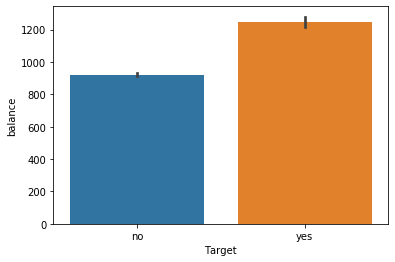

In [1790]:
# Target vs balance
sns.barplot(x='Target', y='balance', data=df)
plt.show();

* We do see that customers with higher balance have more term deposits

### Target vs duration

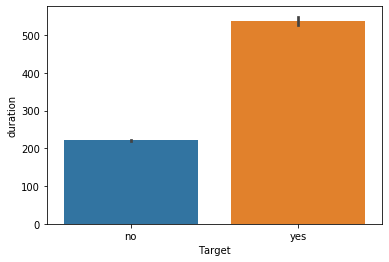

In [1791]:
sns.barplot(x='Target', y='duration', data=df)
plt.show();

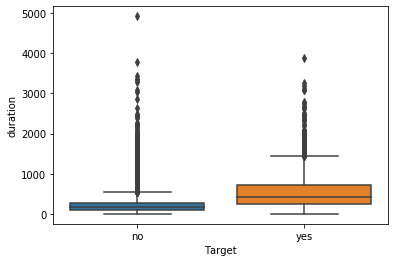

In [1792]:
sns.boxplot(x='Target', y='duration', data=df)
plt.show();

In [1793]:
# As we can see from the plot above where duration of the call is longer more customers subscribed
# which is understandable as the subscription process would have taken more time
# it doesn't really reflect whether a longer duration impacted the decision of customer 
# it seems the other way where a customer made a positive decision and hence a longer call duration
# dropping 'duration' as it's value will be known after call and doesn't seem to be impacting target variable for prediction 
df=df.drop(['duration'],axis=1)

### Target vs job

In [1794]:
# Target vs Job
pd.crosstab(df['job'], df['Target'], normalize='index')

Target              no       yes
job                             
blue-collar   0.925603  0.074397
entrepreneur  0.898891  0.101109
management    0.867967  0.132033
retired       0.772966  0.227034
services      0.911170  0.088830
student       0.713220  0.286780
technician    0.889430  0.110570
unemployed    0.844973  0.155027
unknown       0.868132  0.131868

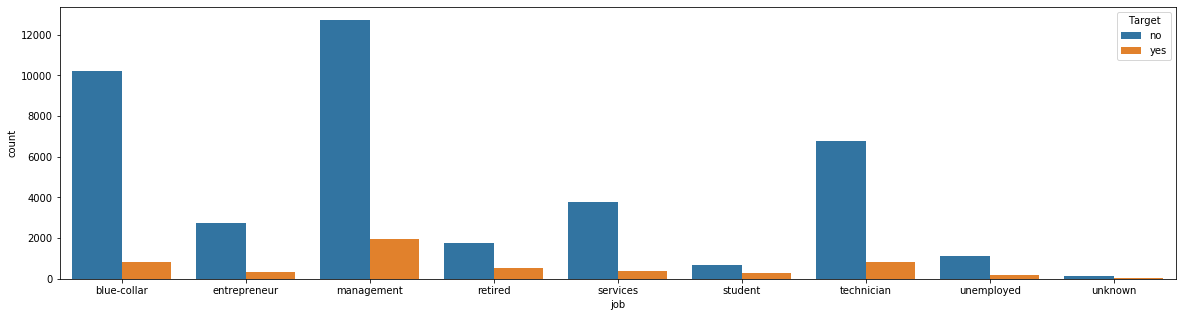

In [1795]:
plt.figure(figsize=(20,5))
sns.countplot(x='job',hue='Target', data=df);

As we see from above highest percentages for customers accepting term deposit are (converion rate):
* Student subscribed to term deposit = 28.67%
* Retired subscribed to term deposit = 22.79%
* Unempld subscribed to term deposit = 15.50%

Overall people with job as management have more term deposits followed by technician and blue-collar jobs

### Target vs marital

In [1796]:
# Target vs Marital
pd.crosstab(df['marital'], df['Target'], normalize='index')

Target          no       yes
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492

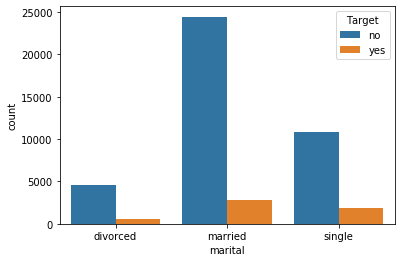

In [1797]:
sns.countplot(x='marital',hue='Target', data=df);

As we see from above highest percentages for customers accepting term deposit are (conversion rate):
* Single subscribed to term deposit = 14.94%
* Divorced subscribed to term deposit = 11.94%

Overall married customers have more term deposits followed by single customers

### Target vs Education

In [1798]:
# Target vs Education
pd.crosstab(df['education'], df['Target'], normalize='index')

Target           no       yes
education                    
primary    0.913718  0.086282
secondary  0.894382  0.105618
tertiary   0.849073  0.150927
unknown    0.860973  0.139027

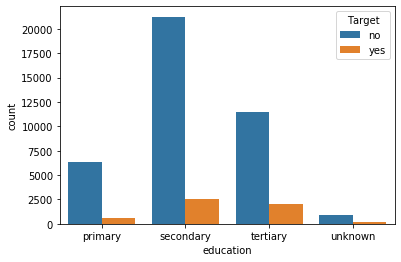

In [1799]:
sns.countplot(x='education',hue='Target', data=df);

As we see from above highest percentages for customers accepting term deposit are (conversion rate):
* Customers with Tertiary(higher) education subscribed to term deposit = 15%
* Next highest %age is for customers for whom we do not know their education = 13.57%

Overall customers with secondary education have more term deposits followed by tertiary education

### Target vs credit default

In [1800]:
# Target vs Default
pd.crosstab(df['default'], df['Target'], normalize='index')

Target         no       yes
default                    
no       0.882039  0.117961
yes      0.936196  0.063804

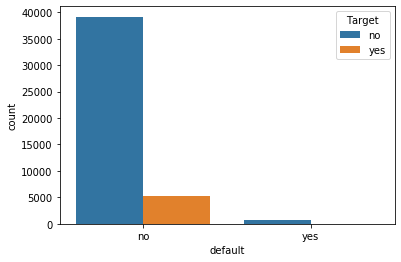

In [1801]:
sns.countplot(x='default',hue='Target', data=df);

As we see from above customers who do not default on credit have a higher %age of accepting term deposit 

### Target vs Housing loan

In [1802]:
# Target vs Housing
pd.crosstab(df['housing'], df['Target'], normalize='index')

Target         no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000

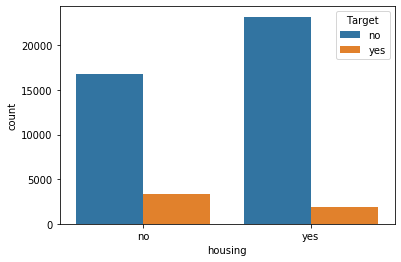

In [1803]:
sns.countplot(x='housing',hue='Target', data=df);

As we see from above customers who do not have home loan had higher %age accepting term deposits

### Target vs Personal Loan

In [1804]:
# Target vs Loan
pd.crosstab(df['loan'], df['Target'], normalize='index')

Target        no       yes
loan                      
no      0.873443  0.126557
yes     0.933186  0.066814

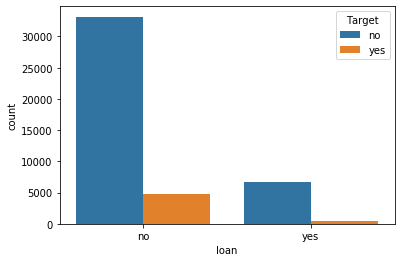

In [1805]:
sns.countplot(x='loan',hue='Target', data=df);

As we see from above customers who do not have personal loan had higher %age accepting term deposit

### Target vs Contact

In [1806]:
# Target vs Contact
pd.crosstab(df['contact'], df['Target'])

Target        no   yes
contact               
cellular   24916  4369
telephone   2516   390
unknown    12490   530

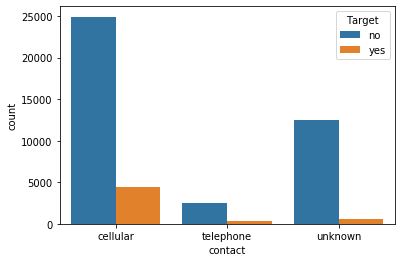

In [1807]:
sns.countplot(x='contact',hue='Target', data=df);

We see from above that there are 13020 records where contact is Unkown. From that count 530 have Target variable as 'yes'.
We also see that for majority where the Target variable is 'yes', the contact type was cellular. 
Hence, we can safely move unknown contacts where Target is 'yes' to contact as 'cellular'

In [1808]:
df.loc[(df['contact']=='unknown') & (df['Target']=='yes'), 'contact'] = 'cellular'

### Encode categorical variables

In [1809]:
le = preprocessing.LabelEncoder()
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.default = le.fit_transform(df.default)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.contact = le.fit_transform(df.contact)
df.month = le.fit_transform(df.month)
df.poutcome = le.fit_transform(df.poutcome)
df.Target = le.fit_transform(df.Target)
df.describe().T

count        mean          std   min   25%    50%     75%  \
age              45211.0   40.936210    10.618762  18.0  33.0   39.0    48.0   
job              45211.0    2.581562     2.205370   0.0   1.0    2.0     4.0   
marital          45211.0    1.167725     0.608230   0.0   1.0    1.0     2.0   
education        45211.0    1.191568     0.710272   0.0   1.0    1.0     2.0   
default          45211.0    0.018027     0.133049   0.0   0.0    0.0     0.0   
balance          45211.0  959.726704  1148.515651   0.0  72.0  448.0  1428.0   
housing          45211.0    0.555838     0.496878   0.0   0.0    1.0     1.0   
loan             45211.0    0.160226     0.366820   0.0   0.0    0.0     0.0   
contact          45211.0    0.616797     0.888198   0.0   0.0    0.0     2.0   
day              45211.0   15.806419     8.322476   1.0   8.0   16.0    21.0   
month            45211.0    5.523014     3.006911   0.0   3.0    6.0     8.0   
campaign         45211.0    2.763841     3.098021   1.0   1.0    2.0     3.0   
previous         45211.0    0.580323     2.303441   0.0   0.0    0.0     0.0   
poutcome         45211.0    2.559974     0.989059   0.0   3.0    3.0     3.0   
Target           45211.0    0.116985     0.321406   0.0   0.0    0.0     0.0   
pdays_zero       45211.0    0.817367     0.386369   0.0   1.0    1.0     1.0   
pdays_less_100   45211.0    0.031784     0.175427   0.0   0.0    0.0     0.0   
pdays_great_100  45211.0    0.150848     0.357905   0.0   0.0    0.0     0.0   

                    max  
age                95.0  
job                 8.0  
marital             2.0  
education           3.0  
default             1.0  
balance          3462.0  
housing             1.0  
loan                1.0  
contact             2.0  
day                31.0  
month              11.0  
campaign           63.0  
previous          275.0  
poutcome            3.0  
Target              1.0  
pdays_zero          1.0  
pdays_less_100      1.0  
pdays_great_100     1.0

#### Let's handle class imbalance in target variable by over sampling

In [1810]:
df['Target'].value_counts(normalize=True)
df_copy=df.copy()
df_2copy=df_copy[df.Target==1]
df_copy=pd.concat([df_copy, df_2copy])
df_copy=pd.concat([df_copy, df_2copy])
df_copy=pd.concat([df_copy, df_2copy])
df_copy=pd.concat([df_copy, df_2copy])
df_copy=pd.concat([df_copy, df_2copy])
df_copy=pd.concat([df_copy, df_2copy])
df_copy=pd.concat([df_copy, df_2copy])
df=df_copy
df['Target'].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: Target, dtype: float64

1    0.514532
0    0.485468
Name: Target, dtype: float64

## Split data and create Models

In [1811]:
x=df.drop('Target',axis=1) # Independent variables
y=df['Target']             # Dependent variable
features = [col for col in df.columns if col != 'Target']

In [1812]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)   # Split data in 70:30 ratio

### Normalize/Scale

In [1813]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Logistic Regression

In [1814]:
logreg = LogisticRegression(random_state=1)
logreg.fit(x_train, y_train)                     # Fit training dataset

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1878]:
print("Train: %.2f" % logreg.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % logreg.score(x_test, y_test))  # performance on test data

Train: 0.70
Test: 0.69


In [1816]:
y_predict = logreg.predict(x_test)             # Get predicted

In [1817]:
# Confusion matrix
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted     0     1
Actual               
0          7230  4860
1          2726  9855

In [1818]:
# Check different metrics
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
print()
var_recall=recall_score(y_test,y_predict)
print("Recall:",var_recall)
var_precision=precision_score(y_test,y_predict)
print("Precision:",var_precision)
var_f1=f1_score(y_test,y_predict)
print("F1 Score:",var_f1)
var_roc=roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",var_roc)
var_accuracy=accuracy_score(y_test,y_predict)
print("Accuracy Score:",var_accuracy)
print()
print(classification_report(y_test, y_predict))

Training accuracy is 0.6955683338255476
Testing accuracy is 0.692513477362085
Confusion Matrix
[[7230 4860]
 [2726 9855]]

Recall: 0.7833240600906128
Precision: 0.6697247706422018
F1 Score: 0.7220838218053928
Roc Auc Score: 0.6906694742140409
Accuracy Score: 0.692513477362085

              precision    recall  f1-score   support

           0       0.73      0.60      0.66     12090
           1       0.67      0.78      0.72     12581

    accuracy                           0.69     24671
   macro avg       0.70      0.69      0.69     24671
weighted avg       0.70      0.69      0.69     24671



#### Perform Grid search to get best params for Logistic Regression Model

In [1819]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [0.01,0.1,0.25,0.5,0.75,1]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

hyperparameters = dict(C=C, penalty=penalty, solver = solver)

logistic = LogisticRegression()

final_model = RandomizedSearchCV(logistic, hyperparameters, verbose=0)
final_model.fit(x_train,y_train)


y_predict = final_model.predict(x_test)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 0.25, 0.5, 0.75, 1],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear'

In [1820]:
# Check different metrics
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
print()
var_recall=recall_score(y_test,y_predict)
print("Recall:",var_recall)
var_precision=precision_score(y_test,y_predict)
print("Precision:",var_precision)
var_f1=f1_score(y_test,y_predict)
print("F1 Score:",var_f1)
var_roc=roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",var_roc)
var_accuracy=accuracy_score(y_test,y_predict)
print("Accuracy Score:",var_accuracy)
print()
print(classification_report(y_test, y_predict))

Training accuracy is 0.6953077497698175
Testing accuracy is 0.692189210003648
Confusion Matrix
[[7221 4869]
 [2725 9856]]

Recall: 0.7834035450282172
Precision: 0.6693378607809847
F1 Score: 0.7218926243316487
Roc Auc Score: 0.6903370082461184
Accuracy Score: 0.692189210003648

              precision    recall  f1-score   support

           0       0.73      0.60      0.66     12090
           1       0.67      0.78      0.72     12581

    accuracy                           0.69     24671
   macro avg       0.70      0.69      0.69     24671
weighted avg       0.70      0.69      0.69     24671



##### Put results in a dataframe for comparison later

In [1821]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': var_accuracy, 'Recall': var_recall,'Precision': var_precision,'F1 Score': var_f1,'ROC AUC Score': var_roc})
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Accuracy    Recall  Precision  F1 Score  ROC AUC Score
0  Logistic Regression  0.692189  0.783404   0.669338  0.721893       0.690337

### Decision Tree

In [1822]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=1 )
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [1877]:
print("Train: %.2f" % dt.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % dt.score(x_test, y_test))  # performance on test data

Train: 1.00
Test: 0.95


#### There is a high degree of overfitting in the model due to which the test accuracy drops.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.185652 to fit



True

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.185652 to fit



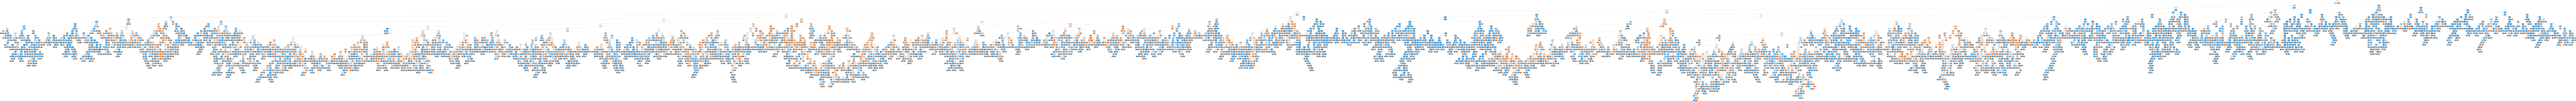

In [1824]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('TD_Sales.png')
Image(graph.create_png())

In [1825]:
y_predict  = dt.predict(x_test)

In [1826]:
# Confusion matrix
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted      0      1
Actual                 
0          10765   1325
1              0  12581

In [1827]:
# Check different metrics
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
var_recall=recall_score(y_test,y_predict)
print("Recall:",var_recall)
var_precision=precision_score(y_test,y_predict)
print("Precision:",var_precision)
var_f1=f1_score(y_test,y_predict)
print("F1 Score:",var_f1)
var_roc=roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",var_roc)
var_accuracy=accuracy_score(y_test,y_predict)
print("Accuracy Score:",var_accuracy)
print()
print(classification_report(y_test, y_predict))

Training accuracy is 0.999982627729618
Testing accuracy is 0.9462932187588667
Confusion Matrix
[[10765  1325]
 [    0 12581]]
Recall: 1.0
Precision: 0.904717388177765
F1 Score: 0.9499754596594556
Roc Auc Score: 0.9452026468155501
Accuracy Score: 0.9462932187588667

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     12090
           1       0.90      1.00      0.95     12581

    accuracy                           0.95     24671
   macro avg       0.95      0.95      0.95     24671
weighted avg       0.95      0.95      0.95     24671



In [1828]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': var_accuracy, 'Recall': var_recall,'Precision': var_precision,'F1 Score': var_f1,'ROC AUC Score': var_roc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Accuracy    Recall  Precision  F1 Score  ROC AUC Score
0  Logistic Regression  0.692189  0.783404   0.669338  0.721893       0.690337
0        Decision Tree  0.946293  1.000000   0.904717  0.949975       0.945203

### Prune the Decision Tree

In [1915]:
dt_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=6)
dt_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1916]:
print("Train: %.2f" % dt_pruned.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % dt_pruned.score(x_test, y_test))  # performance on test data

Train: 0.69
Test: 0.69


#### When the tree is regularized, overfitting is reduced.

True

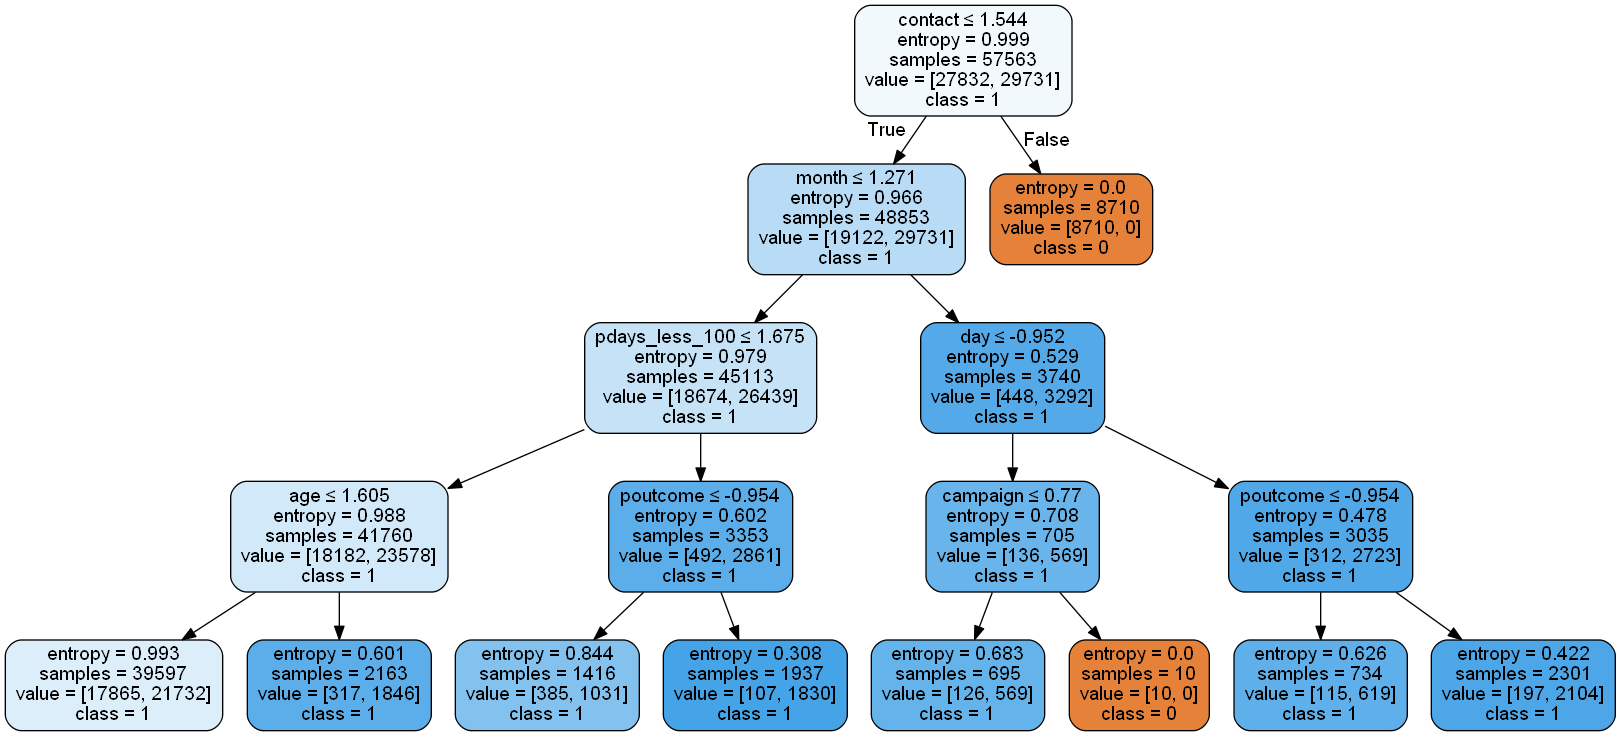

In [1831]:
dot_data = StringIO()
export_graphviz(dt_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('TD_Sales_Pruned.png')
Image(graph.create_png())

In [1832]:
y_predict  = dt_pruned.predict(x_test)

In [1833]:
# Confusion matrix
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted     0      1
Actual                
0          3783   8307
1             0  12581

In [1834]:
# Check different metrics
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
var_recall=recall_score(y_test,y_predict)
print("Recall:",var_recall)
var_precision=precision_score(y_test,y_predict)
print("Precision:",var_precision)
var_f1=f1_score(y_test,y_predict)
print("F1 Score:",var_f1)
var_roc=roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",var_roc)
var_accuracy=accuracy_score(y_test,y_predict)
print("Accuracy Score:",var_accuracy)
print()
print(classification_report(y_test, y_predict))

Training accuracy is 0.6679811684589059
Testing accuracy is 0.6632888816829476
Confusion Matrix
[[ 3783  8307]
 [    0 12581]]
Recall: 1.0
Precision: 0.602307545001915
F1 Score: 0.7518001732946906
Roc Auc Score: 0.6564516129032258
Accuracy Score: 0.6632888816829476

              precision    recall  f1-score   support

           0       1.00      0.31      0.48     12090
           1       0.60      1.00      0.75     12581

    accuracy                           0.66     24671
   macro avg       0.80      0.66      0.61     24671
weighted avg       0.80      0.66      0.62     24671



##### Calculating the feature importance

In [1835]:
feat_importance = dt_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(features, dt_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
contact          0.783549
month            0.080038
pdays_less_100   0.066022
age              0.047831
poutcome         0.018564
day              0.002164
campaign         0.001832
default          0.000000
balance          0.000000
housing          0.000000
loan             0.000000
job              0.000000
education        0.000000
previous         0.000000
pdays_zero       0.000000
marital          0.000000
pdays_great_100  0.000000

From above table we can infer that contact and month impact our target variable most.

##### Insert into result data frame

In [1836]:
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'Accuracy': var_accuracy, 'Recall': var_recall,'Precision': var_precision,'F1 Score': var_f1,'ROC AUC Score': var_roc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Accuracy    Recall  Precision  F1 Score  \
0   Logistic Regression  0.692189  0.783404   0.669338  0.721893   
0         Decision Tree  0.946293  1.000000   0.904717  0.949975   
0  Pruned Decision Tree  0.663289  1.000000   0.602308  0.751800   

   ROC AUC Score  
0       0.690337  
0       0.945203  
0       0.656452

### Random Forest

In [1837]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

In [1838]:
print("Train: %.2f" % rfcl.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % rfcl.score(x_test, y_test))  # performance on test data

Train: 1.00
Test: 0.97


In [1839]:
y_predict  = rfcl.predict(x_test)

In [1840]:
# Confusion matrix
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted      0      1
Actual                 
0          11368    722
1              0  12581

In [1841]:
# Check different metrics
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
var_recall=recall_score(y_test,y_predict)
print("Recall:",var_recall)
var_precision=precision_score(y_test,y_predict)
print("Precision:",var_precision)
var_f1=f1_score(y_test,y_predict)
print("F1 Score:",var_f1)
var_roc=roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",var_roc)
var_accuracy=accuracy_score(y_test,y_predict)
print("Accuracy Score:",var_accuracy)
print()
print(classification_report(y_test, y_predict))

Training accuracy is 0.999982627729618
Testing accuracy is 0.9707348709010579
Confusion Matrix
[[11368   722]
 [    0 12581]]
Recall: 1.0
Precision: 0.9457265278508608
F1 Score: 0.9721063205068768
Roc Auc Score: 0.9701406120760959
Accuracy Score: 0.9707348709010579

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     12090
           1       0.95      1.00      0.97     12581

    accuracy                           0.97     24671
   macro avg       0.97      0.97      0.97     24671
weighted avg       0.97      0.97      0.97     24671



In [1842]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


##### Perform random search to get best model

In [1843]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 79.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

##### Check best parameters

In [1844]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

##### Predict using final model

In [1845]:
y_predict  = rf_random.predict(x_test)

In [1846]:
# Confusion matrix
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted      0      1
Actual                 
0          11635    455
1              0  12581

In [1847]:
# Check different metrics
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
var_recall=recall_score(y_test,y_predict)
print("Recall:",var_recall)
var_precision=precision_score(y_test,y_predict)
print("Precision:",var_precision)
var_f1=f1_score(y_test,y_predict)
print("F1 Score:",var_f1)
var_roc=roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",var_roc)
var_accuracy=accuracy_score(y_test,y_predict)
print("Accuracy Score:",var_accuracy)
print()
print(classification_report(y_test, y_predict))

Training accuracy is 0.999982627729618
Testing accuracy is 0.9815572939888938
Confusion Matrix
[[11635   455]
 [    0 12581]]
Recall: 1.0
Precision: 0.9650966554157717
F1 Score: 0.9822383573408283
Roc Auc Score: 0.9811827956989247
Accuracy Score: 0.9815572939888938

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     12090
           1       0.97      1.00      0.98     12581

    accuracy                           0.98     24671
   macro avg       0.98      0.98      0.98     24671
weighted avg       0.98      0.98      0.98     24671



##### Insert into result data frame

In [1848]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': var_accuracy, 'Recall': var_recall,'Precision': var_precision,'F1 Score': var_f1,'ROC AUC Score': var_roc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Accuracy    Recall  Precision  F1 Score  \
0   Logistic Regression  0.692189  0.783404   0.669338  0.721893   
0         Decision Tree  0.946293  1.000000   0.904717  0.949975   
0  Pruned Decision Tree  0.663289  1.000000   0.602308  0.751800   
0         Random Forest  0.981557  1.000000   0.965097  0.982238   

   ROC AUC Score  
0       0.690337  
0       0.945203  
0       0.656452  
0       0.981183

### Bagging

In [1849]:
bgcl = BaggingClassifier(n_estimators=50, max_samples= .5, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(x_train, y_train)

In [1850]:
print("Train: %.2f" % bgcl.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % bgcl.score(x_test, y_test))  # performance on test data

Train: 0.99
Test: 0.95


In [1851]:
y_predict  = bgcl.predict(x_test)

In [1852]:
# Confusion matrix
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted      0      1
Actual                 
0          10917   1173
1              0  12581

In [1853]:
# Check different metrics
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
var_recall=recall_score(y_test,y_predict)
print("Recall:",var_recall)
var_precision=precision_score(y_test,y_predict)
print("Precision:",var_precision)
var_f1=f1_score(y_test,y_predict)
print("F1 Score:",var_f1)
var_roc=roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",var_roc)
var_accuracy=accuracy_score(y_test,y_predict)
print("Accuracy Score:",var_accuracy)
print()
print(classification_report(y_test, y_predict))

Training accuracy is 0.9916786824870142
Testing accuracy is 0.9524542985691703
Confusion Matrix
[[10917  1173]
 [    0 12581]]
Recall: 1.0
Precision: 0.9147157190635451
F1 Score: 0.9554585152838427
Roc Auc Score: 0.9514888337468982
Accuracy Score: 0.9524542985691703

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     12090
           1       0.91      1.00      0.96     12581

    accuracy                           0.95     24671
   macro avg       0.96      0.95      0.95     24671
weighted avg       0.96      0.95      0.95     24671



In [1854]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'bootstrap': [True, False]}


##### Perform random search for best model

In [1855]:
bgcl = BaggingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
bgcl_random = RandomizedSearchCV(estimator = bgcl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
bgcl_random.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 53.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BaggingClassifier(base_estimator=None,
                                               bootstrap=True,
                                               bootstrap_features=False,
                                               max_features=1.0,
                                               max_samples=1.0, n_estimators=10,
                                               n_jobs=None, oob_score=False,
                                               random_state=None, verbose=0,
                                               warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   pre_dispatch

##### Check best parameters

In [1856]:
bgcl_random.best_params_

{'n_estimators': 400, 'bootstrap': True}

##### Predict using final model

In [1857]:
y_predict  = bgcl_random.predict(x_test)

In [1858]:
# Check different metrics
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
var_recall=recall_score(y_test,y_predict)
print("Recall:",var_recall)
var_precision=precision_score(y_test,y_predict)
print("Precision:",var_precision)
var_f1=f1_score(y_test,y_predict)
print("F1 Score:",var_f1)
var_roc=roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",var_roc)
var_accuracy=accuracy_score(y_test,y_predict)
print("Accuracy Score:",var_accuracy)
print()
print(classification_report(y_test, y_predict))

Training accuracy is 0.999982627729618
Testing accuracy is 0.9661545944631349
Confusion Matrix
[[11255   835]
 [    0 12581]]
Recall: 1.0
Precision: 0.9377608825283243
F1 Score: 0.9678809093356926
Roc Auc Score: 0.9654673283705542
Accuracy Score: 0.9661545944631349

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     12090
           1       0.94      1.00      0.97     12581

    accuracy                           0.97     24671
   macro avg       0.97      0.97      0.97     24671
weighted avg       0.97      0.97      0.97     24671



##### Update results data frame

In [1859]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'Accuracy': var_accuracy, 'Recall': var_recall,'Precision': var_precision,'F1 Score': var_f1,'ROC AUC Score': var_roc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Accuracy    Recall  Precision  F1 Score  \
0   Logistic Regression  0.692189  0.783404   0.669338  0.721893   
0         Decision Tree  0.946293  1.000000   0.904717  0.949975   
0  Pruned Decision Tree  0.663289  1.000000   0.602308  0.751800   
0         Random Forest  0.981557  1.000000   0.965097  0.982238   
0               Bagging  0.966155  1.000000   0.937761  0.967881   

   ROC AUC Score  
0       0.690337  
0       0.945203  
0       0.656452  
0       0.981183  
0       0.965467

### Adaboosting

In [1860]:
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(x_train, y_train)

In [1861]:
print("Train: %.2f" % abcl.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % abcl.score(x_test, y_test))  # performance on test data

Train: 0.71
Test: 0.71


In [1862]:
y_predict  = abcl.predict(x_test)

In [1863]:
# Confusion matrix
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted     0      1
Actual                
0          5850   6240
1           998  11583

In [1864]:
# Check different metrics
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
var_recall=recall_score(y_test,y_predict)
print("Recall:",var_recall)
var_precision=precision_score(y_test,y_predict)
print("Precision:",var_precision)
var_f1=f1_score(y_test,y_predict)
print("F1 Score:",var_f1)
var_roc=roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",var_roc)
var_accuracy=accuracy_score(y_test,y_predict)
print("Accuracy Score:",var_accuracy)
print()
print(classification_report(y_test, y_predict))

Training accuracy is 0.7056268783767351
Testing accuracy is 0.706619107454096
Confusion Matrix
[[ 5850  6240]
 [  998 11583]]
Recall: 0.9206740322708846
Precision: 0.649890590809628
F1 Score: 0.7619392185238784
Roc Auc Score: 0.7022725000064101
Accuracy Score: 0.706619107454096

              precision    recall  f1-score   support

           0       0.85      0.48      0.62     12090
           1       0.65      0.92      0.76     12581

    accuracy                           0.71     24671
   macro avg       0.75      0.70      0.69     24671
weighted avg       0.75      0.71      0.69     24671



In [1865]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


#### Random search to get best model

In [1866]:
abcl = BaggingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
abcl_random = RandomizedSearchCV(estimator = abcl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
abcl_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BaggingClassifier(base_estimator=None,
                                               bootstrap=True,
                                               bootstrap_features=False,
                                               max_features=1.0,
                                               max_samples=1.0, n_estimators=10,
                                               n_jobs=None, oob_score=False,
                                               random_state=None, verbose=0,
                                               warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_

##### Predict using model as per ramdomized search

In [1868]:
y_predict  = abcl_random.predict(x_test)

In [1869]:
# Check different metrics
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
var_recall=recall_score(y_test,y_predict)
print("Recall:",var_recall)
var_precision=precision_score(y_test,y_predict)
print("Precision:",var_precision)
var_f1=f1_score(y_test,y_predict)
print("F1 Score:",var_f1)
var_roc=roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",var_roc)
var_accuracy=accuracy_score(y_test,y_predict)
print("Accuracy Score:",var_accuracy)
print()
print(classification_report(y_test, y_predict))

Training accuracy is 0.999982627729618
Testing accuracy is 0.9661951278829395
Confusion Matrix
[[11256   834]
 [    0 12581]]
Recall: 1.0
Precision: 0.9378307864330973
F1 Score: 0.9679181412525004
Roc Auc Score: 0.9655086848635236
Accuracy Score: 0.9661951278829395

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     12090
           1       0.94      1.00      0.97     12581

    accuracy                           0.97     24671
   macro avg       0.97      0.97      0.97     24671
weighted avg       0.97      0.97      0.97     24671



##### Update results data frame

In [1870]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'Accuracy': var_accuracy, 'Recall': var_recall,'Precision': var_precision,'F1 Score': var_f1,'ROC AUC Score': var_roc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Accuracy    Recall  Precision  F1 Score  \
0   Logistic Regression  0.692189  0.783404   0.669338  0.721893   
0         Decision Tree  0.946293  1.000000   0.904717  0.949975   
0  Pruned Decision Tree  0.663289  1.000000   0.602308  0.751800   
0         Random Forest  0.981557  1.000000   0.965097  0.982238   
0               Bagging  0.966155  1.000000   0.937761  0.967881   
0              Adaboost  0.966195  1.000000   0.937831  0.967918   

   ROC AUC Score  
0       0.690337  
0       0.945203  
0       0.656452  
0       0.981183  
0       0.965467  
0       0.965509

### GradientBoost

In [1871]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(x_train, y_train)

In [1872]:
print("Train: %.2f" % gbcl.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % gbcl.score(x_test, y_test))  # performance on test data

Train: 0.76
Test: 0.76


In [1873]:
y_predict  = gbcl.predict(x_test)

In [1874]:
# Confusion matrix
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted     0      1
Actual                
0          8238   3852
1          2031  10550

In [1875]:
# Check different metrics
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
var_recall=recall_score(y_test,y_predict)
print("Recall:",var_recall)
var_precision=precision_score(y_test,y_predict)
print("Precision:",var_precision)
var_f1=f1_score(y_test,y_predict)
print("F1 Score:",var_f1)
var_roc=roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",var_roc)
var_accuracy=accuracy_score(y_test,y_predict)
print("Accuracy Score:",var_accuracy)
print()
print(classification_report(y_test, y_predict))

Training accuracy is 0.7600715737539739
Testing accuracy is 0.7615418912893681
Confusion Matrix
[[ 8238  3852]
 [ 2031 10550]]
Recall: 0.838566091725618
Precision: 0.7325371476183863
F1 Score: 0.7819738353778305
Roc Auc Score: 0.7599778349446948
Accuracy Score: 0.7615418912893681

              precision    recall  f1-score   support

           0       0.80      0.68      0.74     12090
           1       0.73      0.84      0.78     12581

    accuracy                           0.76     24671
   macro avg       0.77      0.76      0.76     24671
weighted avg       0.77      0.76      0.76     24671



##### Update result data frame

In [1876]:
tempResultsDf = pd.DataFrame({'Method':['Gradient boost'], 'Accuracy': var_accuracy, 'Recall': var_recall,'Precision': var_precision,'F1 Score': var_f1,'ROC AUC Score': var_roc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Accuracy    Recall  Precision  F1 Score  \
0   Logistic Regression  0.692189  0.783404   0.669338  0.721893   
0         Decision Tree  0.946293  1.000000   0.904717  0.949975   
0  Pruned Decision Tree  0.663289  1.000000   0.602308  0.751800   
0         Random Forest  0.981557  1.000000   0.965097  0.982238   
0               Bagging  0.966155  1.000000   0.937761  0.967881   
0              Adaboost  0.966195  1.000000   0.937831  0.967918   
0        Gradient boost  0.761542  0.838566   0.732537  0.781974   

   ROC AUC Score  
0       0.690337  
0       0.945203  
0       0.656452  
0       0.981183  
0       0.965467  
0       0.965509  
0       0.759978

#### From the table above we see that Random Forest gives the best results after handling target class imbalance and scaling the data with an accuracy of 98% and with a good recall, precision and F1 score. Even the ROC AUC score is 98%
The model will give 98% correct prediction for customers who will subscribe to term deposit.

* The other models that performed better were Bagging and Adaboost which also give comparable results.